<a href="https://colab.research.google.com/github/rahiakela/nlp-research-and-practice/blob/main/getting-started-with-nlp/02-spam-filtering/spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Spam Filtering

If you want to build a machine-learning classifier for spam detection, you need to provide
your algorithm with a sufficient number of spam and ham emails. 

The best way to
build such a classifier would be to collect your own ham and spam emails and train your algorithm to detect what you personally would consider spam.

##Setup

In [1]:
import os
import codecs
import random

import nltk
from nltk import word_tokenize
from nltk import NaiveBayesClassifier, classify
from nltk.text import Text

In [ ]:
nltk.download('punkt')

In [ ]:
%%shell

wget https://github.com/rahiakela/nlp-research-and-practice/raw/main/getting-started-with-nlp/datasets/enron1.zip

unzip enron1.zip
rm -rf enron1.zip

##Step 1: Define the data and classes

In [4]:
def read_in(folder):
  files = os.listdir(folder)
  a_list = []
  for a_file in files:
    # skip hidden files
    if not a_file.startswith("."):
      # Read the contents of each files
      f = codecs.open(folder + a_file, "r", encoding="ISO-8859-1", errors="ignore")
      a_list.append(f.read())
      f.close()
  return a_list

In [5]:
# verify that the data is uploaded and read in correctly
spam_list = read_in("enron1/spam/")
print(len(spam_list))
print(spam_list[0])

1500
Subject: system information - january 5 th
Christmass s@ | e - w! Ndows xp home
We have everything!
Wlndows x, p professional 2 oo 2........... 50
Adobe photoshop 7. O........................ 6 o
Microsoft office x. P pro 2 oo 2.............. 6 o
Corel draw graphics suite 11............. 60
Get it quickly: http:// demagnify. Goforthesoft. Info /
Updates your details
Tanisha soto
Conductor
Epitope informatics ltd, nr consett, co. Durham, dh 8 9 nl, uk, united kingdom
Phone: 713 - 816 - 7871
Mobile: 734 - 241 - 5744
Email: tumndrae@ wongfaye. Com
This message is beng sent to confirm your account. Please do not reply directly to this message
This product is a 79 month trial software
Notes:
The contents of this info is for understanding and should not be muddle paralysis
Shamrock snuffer dragging
Time: sun, 11 jan 2004 11: 08: 30 + 0200



In [6]:
ham_list = read_in("enron1/ham/")
print(len(ham_list))
print(ham_list[0])

3672
Subject: hpl nom for october 4, 2000
(see attached file: hpll 004. Xls)
- hpll 004. Xls


In [7]:
random.seed(42)

# combine the data into a single structure
all_emails = [(email_content, "spam") for email_content in spam_list]
all_emails += [(email_content, "ham") for email_content in ham_list]

random.shuffle(all_emails)
print(f"Dataset size = {str(len(all_emails))} emails")

Dataset size = 5172 emails


##Step 2: Split the text into words

In [8]:
# run a tokenizer over text
def tokenize(input):
  word_list = []
  for word in word_tokenize(input):
    word_list.append(word)
  return word_list

In [9]:
input = "What's the best way to split a sentence into words?"
print(tokenize(input))

['What', "'s", 'the', 'best', 'way', 'to', 'split', 'a', 'sentence', 'into', 'words', '?']


In [10]:
def tokenize(input):
  word_list = [word for word in word_tokenize(input)]
  return word_list

In [11]:
input = "What's the best way to split a sentence into words?"
print(tokenize(input))

['What', "'s", 'the', 'best', 'way', 'to', 'split', 'a', 'sentence', 'into', 'words', '?']


##Step 3: Extract and normalize the features

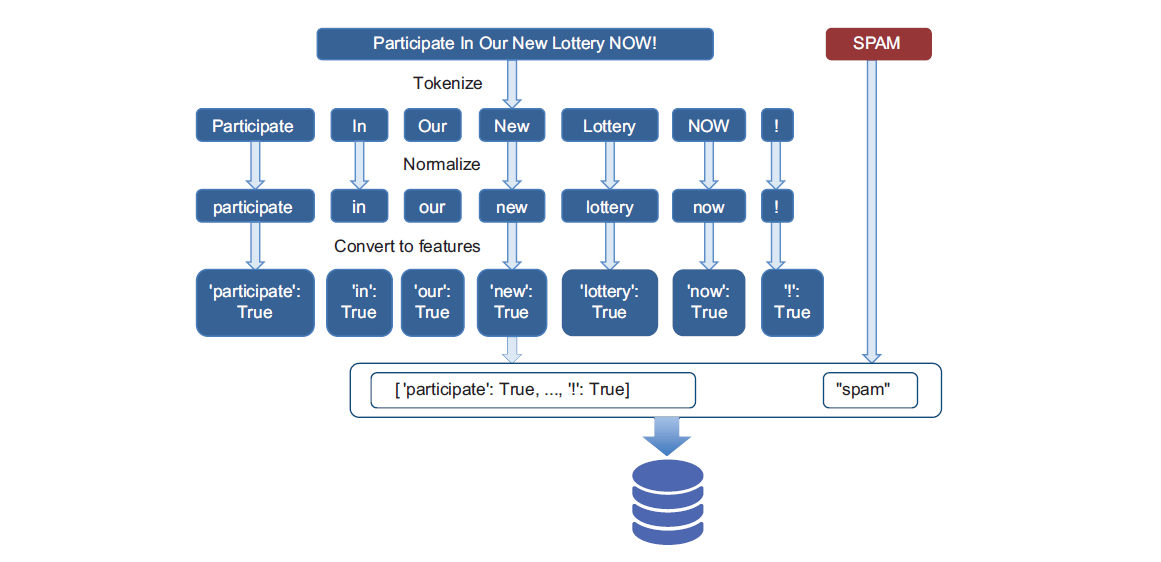

In [14]:
# Let’s define a function that will extract the features from the text input
def get_features(text):
  word_list = [word for word in word_tokenize(text.lower())]
  features = {word: True for word in word_list}
  return features

# Preprocess the texts by tokenising them and removing the stopwords
all_features = [(get_features(email), label) for (email, label) in all_emails]

print(get_features("Participate In Our New Lottery NOW!"))
print(len(all_features))
print(len(all_features[0][0]))
print(len(all_features[99][0]))

{'participate': True, 'in': True, 'our': True, 'new': True, 'lottery': True, 'now': True, '!': True}
5172
10
41


In [21]:
all_features[0]

({'subject': True,
  ':': True,
  '-': True,
  'get': True,
  'a': True,
  'dell': True,
  'laptop': True,
  'computer': True,
  'free': True,
  '!': True},
 'spam')

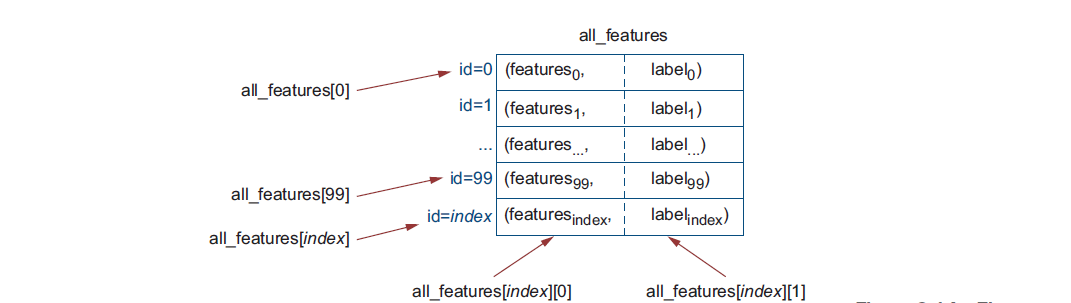

In [23]:
all_features[0][0]

{'subject': True,
 ':': True,
 '-': True,
 'get': True,
 'a': True,
 'dell': True,
 'laptop': True,
 'computer': True,
 'free': True,
 '!': True}

In [24]:
all_features[0][1]

'spam'

##Step 4: Train the classifier